In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [9]:
!pip install seaborn

In [7]:
!pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 1.7 MB/s eta 0:00:05
   --- ------------------------------------ 0.8/8.1 MB 1.5 MB/s eta 0:00:06
   ----- ---------------------------------- 1.0/8.1 MB 1.2 MB/s eta 0:00:06
   ----- ---------------------------------- 1.0/8.1 MB 1.2 MB/s eta 0:00:06
   ----- ---------------------------------- 1.0/8.1 MB 1.2 MB/s eta 0:00:06
   ------ --------------------------------- 1.3/8.1 MB 906.3 kB/s eta 0:00:08
   ------ --------------------------------- 1.3/8.1 MB 906.3 kB/s eta 0:00:08
   ------- -------------------------------- 1.6/8.1 MB 783.9 kB/s eta 0:00:09
   ------- -------------------------------- 1.6/8.1 MB 783.9 kB/s eta 0:00:09
   ------- -------------------------------- 1.6/8.1 MB 783.9 kB/s eta 0:00:09
   --------- ------------------------------ 1.8/8.1 MB 694.1 kB/s eta 0:00:10
   --------- -

In [2]:
# Descargar y leer el dataset
url = 'https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv'
advertising = pd.read_csv(url, index_col=0)

print("Dataset cargado exitosamente!")
print(f"Dimensiones del dataset: {advertising.shape}")
print(f"Columnas: {advertising.columns.tolist()}")

Dataset cargado exitosamente!
Dimensiones del dataset: (200, 4)
Columnas: ['TV', 'Radio', 'Newspaper', 'Sales']


In [3]:
# Matriz de correlación
correlation_matrix = advertising.corr()
print("\nMatriz de correlación:")
print(correlation_matrix.round(3))


Matriz de correlación:
              TV  Radio  Newspaper  Sales
TV         1.000  0.055      0.057  0.782
Radio      0.055  1.000      0.354  0.576
Newspaper  0.057  0.354      1.000  0.228
Sales      0.782  0.576      0.228  1.000


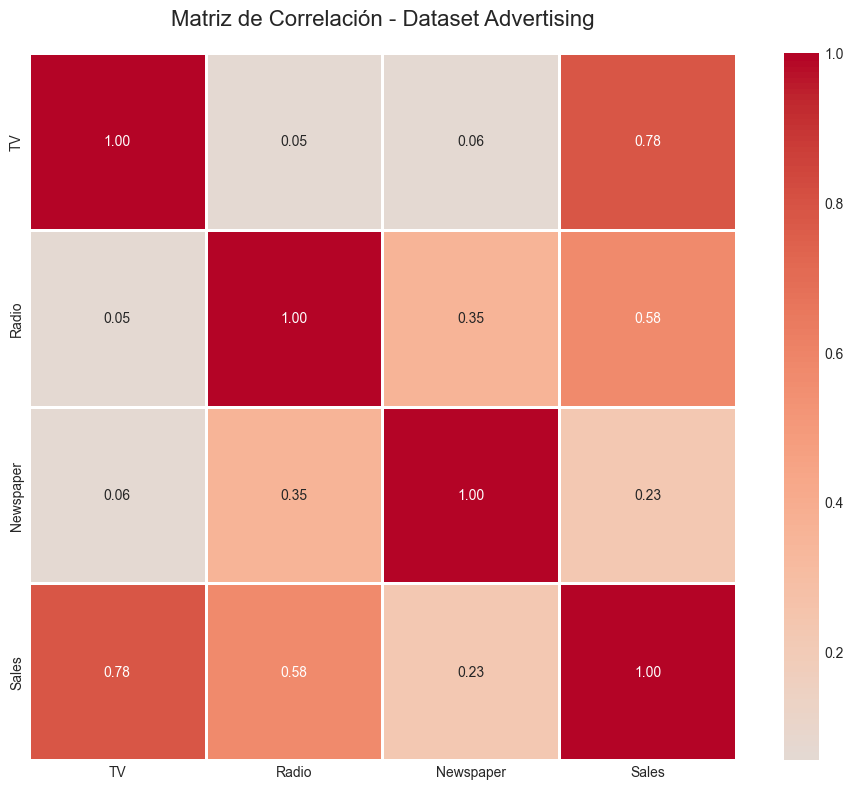

In [11]:
# Visualización de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, fmt='.2f')
plt.title('Matriz de Correlación - Dataset Advertising', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

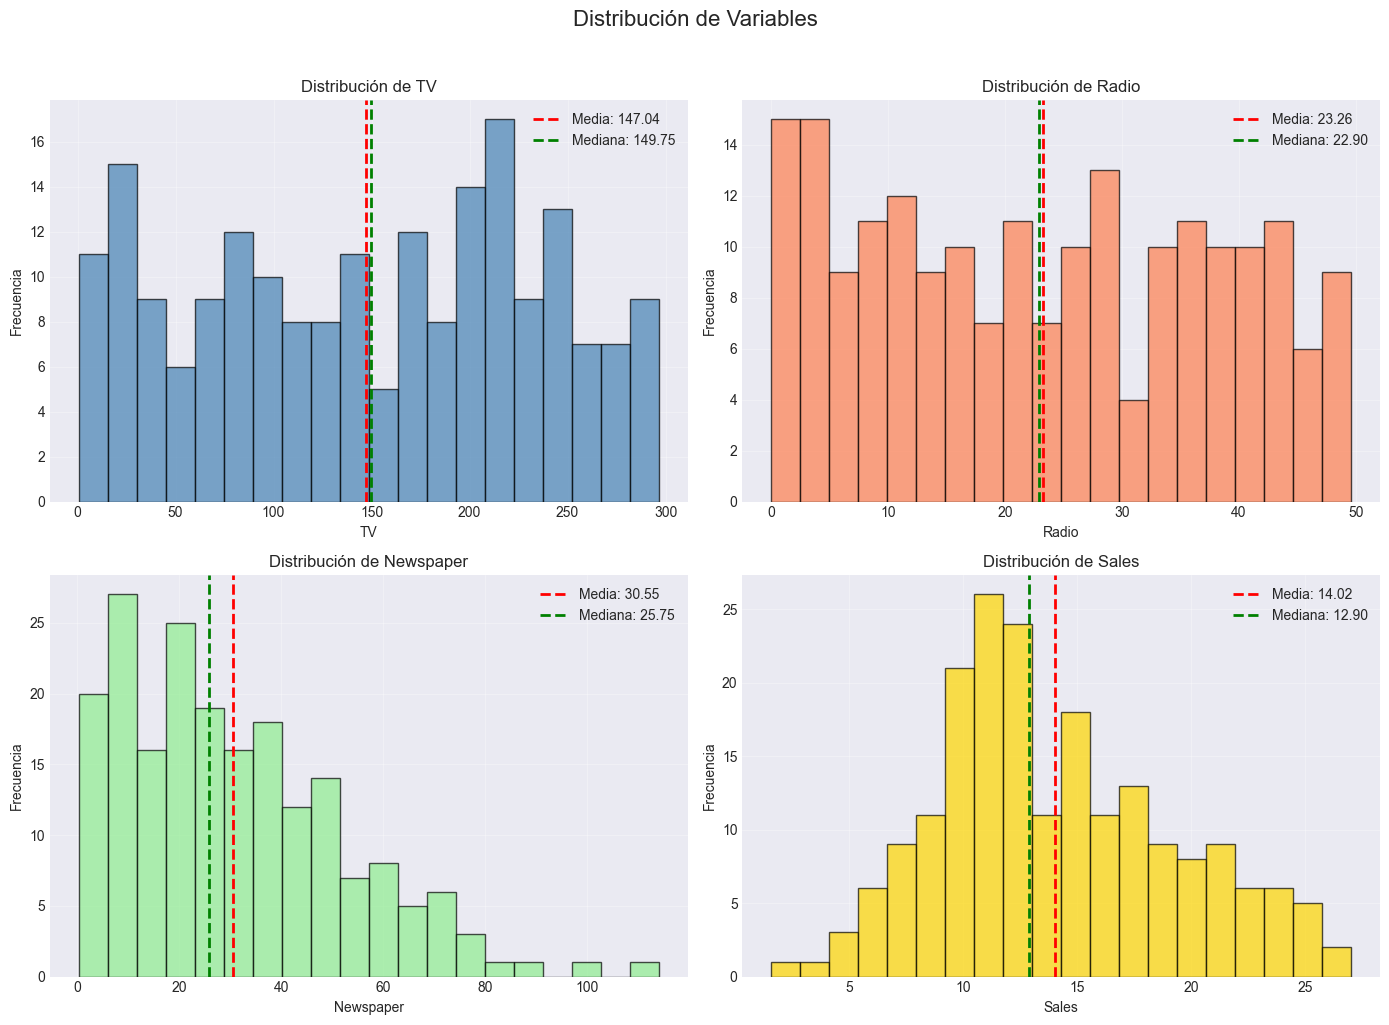

In [12]:
# Distribución de las variables
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribución de Variables', fontsize=16, y=1.02)

variables = ['TV', 'Radio', 'Newspaper', 'Sales']
colors = ['steelblue', 'coral', 'lightgreen', 'gold']

for idx, (ax, var, color) in enumerate(zip(axes.flat, variables, colors)):
    ax.hist(advertising[var], bins=20, edgecolor='black', alpha=0.7, color=color)
    ax.set_title(f'Distribución de {var}', fontsize=12)
    ax.set_xlabel(var)
    ax.set_ylabel('Frecuencia')
    ax.grid(True, alpha=0.3)
    
    # Agregar estadísticas
    mean_val = advertising[var].mean()
    median_val = advertising[var].median()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_val:.2f}')
    ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Mediana: {median_val:.2f}')
    ax.legend()

plt.tight_layout()
plt.show()

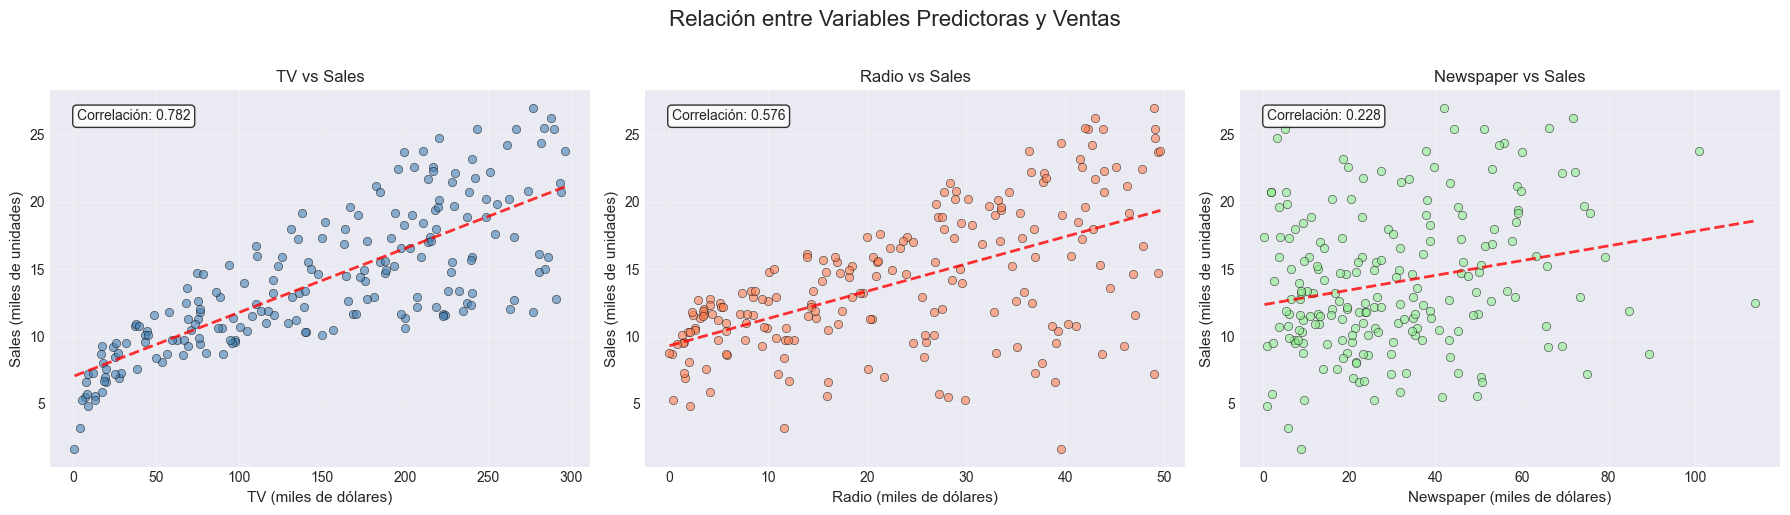

In [13]:
# Relación entre cada variable predictora y las ventas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Relación entre Variables Predictoras y Ventas', fontsize=16, y=1.02)

predictors = ['TV', 'Radio', 'Newspaper']
colors = ['steelblue', 'coral', 'lightgreen']

for ax, predictor, color in zip(axes, predictors, colors):
    ax.scatter(advertising[predictor], advertising['Sales'], alpha=0.6, color=color, edgecolors='black', linewidth=0.5)
    ax.set_xlabel(f'{predictor} (miles de dólares)', fontsize=11)
    ax.set_ylabel('Sales (miles de unidades)', fontsize=11)
    ax.set_title(f'{predictor} vs Sales', fontsize=12)
    ax.grid(True, alpha=0.3)
    
    # Agregar línea de tendencia
    z = np.polyfit(advertising[predictor], advertising['Sales'], 1)
    p = np.poly1d(z)
    ax.plot(advertising[predictor].sort_values(), p(advertising[predictor].sort_values()), 
            "r--", alpha=0.8, linewidth=2)
    
    # Agregar correlación
    corr = advertising[[predictor, 'Sales']].corr().iloc[0, 1]
    ax.text(0.05, 0.95, f'Correlación: {corr:.3f}', transform=ax.transAxes, 
            fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

<Figure size 1200x1000 with 0 Axes>

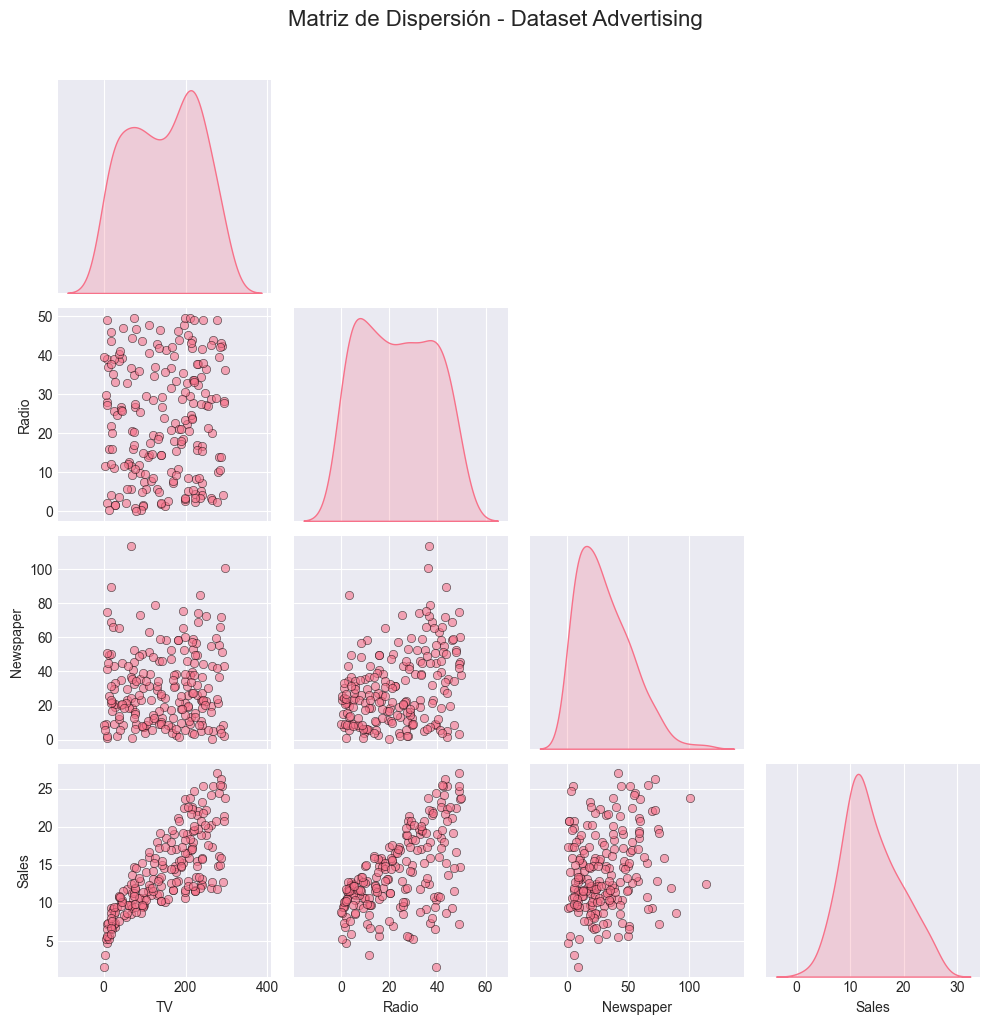

In [14]:
# Pairplot para visualizar todas las relaciones
plt.figure(figsize=(12, 10))
sns.pairplot(advertising, diag_kind='kde', corner=True, 
             plot_kws={'alpha': 0.6, 'edgecolor': 'black', 'linewidth': 0.5})
plt.suptitle('Matriz de Dispersión - Dataset Advertising', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

In [15]:
# Separar características (X) y variable objetivo (y)
X = advertising[['TV', 'Radio', 'Newspaper']]
y = advertising['Sales']

print("Características (X):")
print(X.head())
print(f"\nForma de X: {X.shape}")
print(f"Forma de y: {y.shape}")

Características (X):
      TV  Radio  Newspaper
1  230.1   37.8       69.2
2   44.5   39.3       45.1
3   17.2   45.9       69.3
4  151.5   41.3       58.5
5  180.8   10.8       58.4

Forma de X: (200, 3)
Forma de y: (200,)


In [16]:
# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("División de datos completada:")
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras ({X_test.shape[0]/len(X)*100:.1f}%)")

División de datos completada:
Tamaño del conjunto de entrenamiento: 160 muestras (80.0%)
Tamaño del conjunto de prueba: 40 muestras (20.0%)


In [17]:
# Estandarización de características para Ridge y Lasso del train
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Datos estandarizados para Ridge y Lasso")
print(f"Media de X_train_scaled: {X_train_scaled.mean(axis=0).round(10)}")
print(f"Desviación estándar de X_train_scaled: {X_train_scaled.std(axis=0).round(2)}")

Datos estandarizados para Ridge y Lasso
Media de X_train_scaled: [-0. -0.  0.]
Desviación estándar de X_train_scaled: [1. 1. 1.]


In [18]:
# Estandarización de características para Ridge y Lasso del test

print(f"Media de X_train_scaled: {X_test_scaled.mean(axis=0).round(10)}")
print(f"Desviación estándar de X_train_scaled: {X_test_scaled.std(axis=0).round(2)}")

Media de X_train_scaled: [-0.17686934  0.13157335  0.15004712]
Desviación estándar de X_train_scaled: [1.07 1.01 1.31]


In [19]:
# Entrenar modelo de regresión lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predicciones
y_pred_lr_train = lr_model.predict(X_train)
y_pred_lr_test = lr_model.predict(X_test)

# Métricas
mse_lr_train = mean_squared_error(y_train, y_pred_lr_train)
mse_lr_test = mean_squared_error(y_test, y_pred_lr_test)
rmse_lr_train = np.sqrt(mse_lr_train)
rmse_lr_test = np.sqrt(mse_lr_test)
r2_lr_train = r2_score(y_train, y_pred_lr_train)
r2_lr_test = r2_score(y_test, y_pred_lr_test)
mae_lr_train = mean_absolute_error(y_train, y_pred_lr_train)
mae_lr_test = mean_absolute_error(y_test, y_pred_lr_test)

print("="*50)
print("REGRESIÓN LINEAL NORMAL (OLS)")
print("="*50)
print(f"\nCoeficientes:")
for feature, coef in zip(X.columns, lr_model.coef_):
    print(f"  {feature}: {coef:.6f}")
print(f"\nIntercepto: {lr_model.intercept_:.6f}")
print(f"\nMétricas en Entrenamiento:")
print(f"  RMSE: {rmse_lr_train:.4f}")
print(f"  R²: {r2_lr_train:.4f}")
print(f"  MAE: {mae_lr_train:.4f}")
print(f"\nMétricas en Prueba:")
print(f"  RMSE: {rmse_lr_test:.4f}")
print(f"  R²: {r2_lr_test:.4f}")
print(f"  MAE: {mae_lr_test:.4f}")

REGRESIÓN LINEAL NORMAL (OLS)

Coeficientes:
  TV: 0.044730
  Radio: 0.189195
  Newspaper: 0.002761

Intercepto: 2.979067

Métricas en Entrenamiento:
  RMSE: 1.6447
  R²: 0.8957
  MAE: 1.1985

Métricas en Prueba:
  RMSE: 1.7816
  R²: 0.8994
  MAE: 1.4608


In [20]:
# Probar diferentes valores de alpha
alphas_ridge = [0.001, 0.01, 0.1, 1, 10, 100]
ridge_results = []

for alpha in alphas_ridge:
    ridge_model = Ridge(alpha=alpha, random_state=42)
    ridge_model.fit(X_train_scaled, y_train)
    
    y_pred_train = ridge_model.predict(X_train_scaled)
    y_pred_test = ridge_model.predict(X_test_scaled)
    
    ridge_results.append({
        'alpha': alpha,
        'rmse_train': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'rmse_test': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'r2_train': r2_score(y_train, y_pred_train),
        'r2_test': r2_score(y_test, y_pred_test)
    })

# Convertir a DataFrame para mejor visualización
ridge_df = pd.DataFrame(ridge_results)
print("Resultados de Ridge con diferentes valores de alpha:")
print(ridge_df.to_string(index=False))

Resultados de Ridge con diferentes valores de alpha:
  alpha  rmse_train  rmse_test  r2_train  r2_test
  0.001    1.644728   1.781605  0.895701 0.899437
  0.010    1.644728   1.781654  0.895701 0.899432
  0.100    1.644730   1.782143  0.895700 0.899377
  1.000    1.644987   1.787220  0.895668 0.898803
 10.000    1.667636   1.853716  0.892775 0.891132
100.000    2.427323   2.786288  0.772832 0.754039


In [21]:
# Seleccionar el mejor alpha basado en RMSE de prueba
best_alpha_ridge = ridge_df.loc[ridge_df['rmse_test'].idxmin(), 'alpha']
print(f"\nMejor alpha para Ridge: {best_alpha_ridge}")

# Entrenar modelo final con mejor alpha
ridge_model_best = Ridge(alpha=best_alpha_ridge, random_state=42)
ridge_model_best.fit(X_train_scaled, y_train)

# Predicciones
y_pred_ridge_train = ridge_model_best.predict(X_train_scaled)
y_pred_ridge_test = ridge_model_best.predict(X_test_scaled)

# Métricas
mse_ridge_train = mean_squared_error(y_train, y_pred_ridge_train)
mse_ridge_test = mean_squared_error(y_test, y_pred_ridge_test)
rmse_ridge_train = np.sqrt(mse_ridge_train)
rmse_ridge_test = np.sqrt(mse_ridge_test)
r2_ridge_train = r2_score(y_train, y_pred_ridge_train)
r2_ridge_test = r2_score(y_test, y_pred_ridge_test)
mae_ridge_train = mean_absolute_error(y_train, y_pred_ridge_train)
mae_ridge_test = mean_absolute_error(y_test, y_pred_ridge_test)

print("\n" + "="*50)
print(f"REGRESIÓN RIDGE (alpha={best_alpha_ridge})")
print("="*50)
print(f"\nCoeficientes:")
for feature, coef in zip(X.columns, ridge_model_best.coef_):
    print(f"  {feature}: {coef:.6f}")
print(f"\nIntercepto: {ridge_model_best.intercept_:.6f}")
print(f"\nMétricas en Entrenamiento:")
print(f"  RMSE: {rmse_ridge_train:.4f}")
print(f"  R²: {r2_ridge_train:.4f}")
print(f"  MAE: {mae_ridge_train:.4f}")
print(f"\nMétricas en Prueba:")
print(f"  RMSE: {rmse_ridge_test:.4f}")
print(f"  R²: {r2_ridge_test:.4f}")
print(f"  MAE: {mae_ridge_test:.4f}")


Mejor alpha para Ridge: 0.001

REGRESIÓN RIDGE (alpha=0.001)

Coeficientes:
  TV: 3.764174
  Radio: 2.792288
  Newspaper: 0.055983

Intercepto: 14.100000

Métricas en Entrenamiento:
  RMSE: 1.6447
  R²: 0.8957
  MAE: 1.1985

Métricas en Prueba:
  RMSE: 1.7816
  R²: 0.8994
  MAE: 1.4608


In [22]:
# Probar diferentes valores de alpha
alphas_lasso = [0.001, 0.01, 0.1, 1, 10, 100]
lasso_results = []

for alpha in alphas_lasso:
    lasso_model = Lasso(alpha=alpha, random_state=42, max_iter=10000)
    lasso_model.fit(X_train_scaled, y_train)
    
    y_pred_train = lasso_model.predict(X_train_scaled)
    y_pred_test = lasso_model.predict(X_test_scaled)
    
    lasso_results.append({
        'alpha': alpha,
        'rmse_train': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'rmse_test': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'r2_train': r2_score(y_train, y_pred_train),
        'r2_test': r2_score(y_test, y_pred_test),
        'n_features': np.sum(lasso_model.coef_ != 0)
    })

# Convertir a DataFrame para mejor visualización
lasso_df = pd.DataFrame(lasso_results)
print("Resultados de Lasso con diferentes valores de alpha:")
print(lasso_df.to_string(index=False))

Resultados de Lasso con diferentes valores de alpha:
  alpha  rmse_train  rmse_test  r2_train   r2_test  n_features
  0.001    1.644728   1.781587  0.895701  0.899439           3
  0.010    1.644799   1.781551  0.895692  0.899443           3
  0.100    1.651293   1.791334  0.894867  0.898336           2
  1.000    2.146055   2.396806  0.822428  0.817997           2
 10.000    5.092764   5.631496  0.000000 -0.004757           0
100.000    5.092764   5.631496  0.000000 -0.004757           0


In [23]:
# Seleccionar el mejor alpha basado en RMSE de prueba
best_alpha_lasso = lasso_df.loc[lasso_df['rmse_test'].idxmin(), 'alpha']
print(f"\nMejor alpha para Lasso: {best_alpha_lasso}")

# Entrenar modelo final con mejor alpha
lasso_model_best = Lasso(alpha=best_alpha_lasso, random_state=42, max_iter=10000)
lasso_model_best.fit(X_train_scaled, y_train)

# Predicciones
y_pred_lasso_train = lasso_model_best.predict(X_train_scaled)
y_pred_lasso_test = lasso_model_best.predict(X_test_scaled)

# Métricas
mse_lasso_train = mean_squared_error(y_train, y_pred_lasso_train)
mse_lasso_test = mean_squared_error(y_test, y_pred_lasso_test)
rmse_lasso_train = np.sqrt(mse_lasso_train)
rmse_lasso_test = np.sqrt(mse_lasso_test)
r2_lasso_train = r2_score(y_train, y_pred_lasso_train)
r2_lasso_test = r2_score(y_test, y_pred_lasso_test)
mae_lasso_train = mean_absolute_error(y_train, y_pred_lasso_train)
mae_lasso_test = mean_absolute_error(y_test, y_pred_lasso_test)

print("\n" + "="*50)
print(f"REGRESIÓN LASSO (alpha={best_alpha_lasso})")
print("="*50)
print(f"\nCoeficientes:")
for feature, coef in zip(X.columns, lasso_model_best.coef_):
    if coef != 0:
        print(f"  {feature}: {coef:.6f}")
    else:
        print(f"  {feature}: {coef:.6f} (eliminado)")
print(f"\nIntercepto: {lasso_model_best.intercept_:.6f}")
print(f"\nCaracterísticas seleccionadas: {np.sum(lasso_model_best.coef_ != 0)} de {len(X.columns)}")
print(f"\nMétricas en Entrenamiento:")
print(f"  RMSE: {rmse_lasso_train:.4f}")
print(f"  R²: {r2_lasso_train:.4f}")
print(f"  MAE: {mae_lasso_train:.4f}")
print(f"\nMétricas en Prueba:")
print(f"  RMSE: {rmse_lasso_test:.4f}")
print(f"  R²: {r2_lasso_test:.4f}")
print(f"  MAE: {mae_lasso_test:.4f}")


Mejor alpha para Lasso: 0.01

REGRESIÓN LASSO (alpha=0.01)

Coeficientes:
  TV: 3.754675
  Radio: 2.785686
  Newspaper: 0.048727

Intercepto: 14.100000

Características seleccionadas: 3 de 3

Métricas en Entrenamiento:
  RMSE: 1.6448
  R²: 0.8957
  MAE: 1.1983

Métricas en Prueba:
  RMSE: 1.7816
  R²: 0.8994
  MAE: 1.4590


In [30]:
# Probar diferentes valores de alpha con diferentes conjuntos de entrenamiento
alphas_lasso = [0.001, 0.01, 0.1, 1, 10, 100]
lasso_results = []

X_train_shuffle = X_train.sample(frac=1, random_state=42).reset_index(drop=True)
y_train_shuffle = y_train.reindex(X_train_shuffle.index).reset_index(drop=True)

k = 5
fold_size = len(X_train_shuffle) // k
cortes = [i*fold_size for i in range(k)] + [len(X_train_shuffle)]

X_test_dicc = {}
y_test_dicc = {}

for alpha in alphas_lasso:
    rmse_folds = []
    for i in range(k):

        X_val = X_train_shuffle.iloc[cortes[i]:cortes[i+1]].reset_index(drop=True)
        y_val = y_train_shuffle.iloc[cortes[i]:cortes[i+1]].reset_index(drop=True)
        
        X_train_fold = pd.concat([X_train_shuffle.iloc[:cortes[i]], X_train_shuffle.iloc[cortes[i+1]:]]).reset_index(drop=True)
        y_train_fold = pd.concat([y_train_shuffle.iloc[:cortes[i]], y_train_shuffle.iloc[cortes[i+1]:]]).reset_index(drop=True)
        
        scaler = StandardScaler()
        X_train_fold_scaled = scaler.fit_transform(X_train_fold)
        X_val_scaled = scaler.transform(X_val)
        
        lasso_model = Lasso(alpha=alpha, max_iter=10000)
        lasso_model.fit(X_train_fold_scaled, y_train_fold.iloc[:, 0])

        y_pred_val = lasso_model.predict(X_val_scaled)
        rmse_folds.append(np.sqrt(mean_squared_error(y_val, y_pred_val)))
    
    lasso_results.append({'alpha': alpha, 'rmse_cv': np.mean(rmse_folds)})

lasso_cv_df = pd.DataFrame(lasso_results)
print("Resultados de Lasso con validación cruzada manual:")
print(lasso_cv_df)

best_alpha_lasso = lasso_cv_df.loc[lasso_cv_df['rmse_cv'].idxmin(), 'alpha']
print(f"\nMejor alpha según CV: {best_alpha_lasso}")

# Modelo final con el mejor alpha
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso_final = Lasso(alpha=best_alpha_lasso, max_iter=10000)
lasso_final.fit(X_train_scaled, y_train)

y_pred_train = lasso_final.predict(X_train_scaled)
y_pred_test = lasso_final.predict(X_test_scaled)

def print_metrics(y_true, y_pred, conjunto):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"\n{conjunto}: RMSE={rmse:.4f}, R²={r2:.4f}, MAE={mae:.4f}")

print("\nMODELO FINAL LASSO")
print(f"Coeficientes: {dict(zip(X.columns, lasso_final.coef_))}")
print(f"Intercepto: {lasso_final.intercept_:.6f}")
print_metrics(y_train, y_pred_train, "Entrenamiento")
print_metrics(y_test, y_pred_test, "Prueba")


IndexingError: Too many indexers